The CRISP DM process will be applied to the analysis of public Trinidad and Tobago - Economic, Social, Environmental, Health, Education, Development and Energy data.

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Business Understanding

In this article, we will explore the performance of Trinidad and Tobago (T&T) across several sectors and the inter-dependencies that exist, if any.  More specifically, we will explore economic growth (GDP)

1. Under whose rule did GDP grow the most?
2. Understand if there is any impact to GDP growth as the country invests in energy.
3. What is the correlation between investment in education and unemployment?

Data Understanding

The data was taken from the World Bank data portal and spans a period from 1960 to 2019.  It contains data covering the following topics: Agriculture and Rural Development, Aid Effectiveness, Economy and Growth, Education, Energy and Mining, Environment, Financial Sector, Health, Infrastructure, Social Protection and Labor, Poverty, Private Sector, Public Sector, Science and Technology, Social Development, Urban Development, Gender, Climate Change, External Debt, Trade.

In [381]:
#Read in the data
df = pd.read_csv('indicators_tto.csv')
df.head(n=10)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Trinidad and Tobago,TTO,2004,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,5129
2,Trinidad and Tobago,TTO,2003,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,5100
3,Trinidad and Tobago,TTO,2002,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,5100
4,Trinidad and Tobago,TTO,2001,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,5000
5,Trinidad and Tobago,TTO,2000,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,4950
6,Trinidad and Tobago,TTO,1999,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,4900
7,Trinidad and Tobago,TTO,1998,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,4850
8,Trinidad and Tobago,TTO,1997,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,4800
9,Trinidad and Tobago,TTO,1996,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,4750


In [382]:
df.tail(n=10)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
58180,Trinidad and Tobago,TTO,1984,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,39.654594232059
58181,Trinidad and Tobago,TTO,1983,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,37.766920014477
58182,Trinidad and Tobago,TTO,1982,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,45.3038144527507
58183,Trinidad and Tobago,TTO,1981,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,40.1313664261871
58184,Trinidad and Tobago,TTO,1980,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,39.9152358183004
58185,Trinidad and Tobago,TTO,1979,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,43.0457746478874
58186,Trinidad and Tobago,TTO,1978,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,45.5322057064753
58187,Trinidad and Tobago,TTO,1977,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,38.2957053131896
58188,Trinidad and Tobago,TTO,1976,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,35.1491569390402
58189,Trinidad and Tobago,TTO,1975,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,38.2518585266952


In [383]:
#Check size of dataframe
df.shape

(58190, 6)

In [384]:
#Check for missing values
df.isnull().sum().sum()

0

In [385]:
#Check unique values in Indicator Name and Indicator Code
Code_count = df['Indicator Code'].unique().shape[0]
Name_count = df['Indicator Name'].unique().shape[0]
print("{} unique indicator codes and {} unique indicator names".format(Code_count, Name_count))

2183 unique indicator codes and 2182 unique indicator names


Data Preparation

1. Separate column 'Indicator code' and 'indicator name' into separate columns.  Use '.' as separator.
2. Drop unecessary columns 'Country Name' and 'Country ISO3'.
3. Create a categorical column to indicate which party was in power in which years.

In [386]:
#Splitting the column Indicator code
id_code_df = df['Indicator Code'].apply(lambda x: pd.Series(str(x).split('.')))
#adding to existing dataframe
df[['code_0','code_1','code_2','code_3','code_4','code_5','code_6']] = id_code_df
#remove Indicator Code Column and create new dataframe - df_clean
df_clean = df.drop(columns = 'Indicator Code')
df_clean.head()

,Country Name,Country ISO3,Year,Indicator Name,Value,code_0,code_1,code_2,code_3,code_4,code_5,code_6
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+value+num,#indicator+code,NaN,NaN,NaN,NaN,NaN,NaN
1,Trinidad and Tobago,TTO,2004,"Agricultural machinery, tractors",5129,AG,AGR,TRAC,NO,NaN,NaN,NaN
2,Trinidad and Tobago,TTO,2003,"Agricultural machinery, tractors",5100,AG,AGR,TRAC,NO,NaN,NaN,NaN
3,Trinidad and Tobago,TTO,2002,"Agricultural machinery, tractors",5100,AG,AGR,TRAC,NO,NaN,NaN,NaN
4,Trinidad and Tobago,TTO,2001,"Agricultural machinery, tractors",5000,AG,AGR,TRAC,NO,NaN,NaN,NaN


In [387]:
#Splitting the column Indicator name
id_name_df = df_clean['Indicator Name'].apply(lambda x: pd.Series(str(x).split(',')))
#adding to existing dataframe
df_clean[['name_0','name_1','name_2','name_3']] = id_name_df
#remove Indicator name Column
df_clean = df_clean.drop(columns = 'Indicator Name')
df_clean.head()

,Country Name,Country ISO3,Year,Value,code_0,code_1,code_2,code_3,code_4,code_5,code_6,name_0,name_1,name_2,name_3
0,#country+name,#country+code,#date+year,#indicator+value+num,#indicator+code,NaN,NaN,NaN,NaN,NaN,NaN,#indicator+name,NaN,NaN,NaN
1,Trinidad and Tobago,TTO,2004,5129,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN
2,Trinidad and Tobago,TTO,2003,5100,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN
3,Trinidad and Tobago,TTO,2002,5100,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN
4,Trinidad and Tobago,TTO,2001,5000,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN


In [388]:
#Drop unecessary columns and rows
df_clean = df_clean.drop(columns = ['Country Name','Country ISO3'])
df_clean = df_clean.drop(df_clean.index[0])
df_clean.head()

,Year,Value,code_0,code_1,code_2,code_3,code_4,code_5,code_6,name_0,name_1,name_2,name_3
1,2004,5129,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN
2,2003,5100,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN
3,2002,5100,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN
4,2001,5000,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN
5,2000,4950,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN


In [7]:
#Function to execute above clean-up

def df_cleanup(df_raw,col_drop):
    '''
    Prepares data for analysis in the following way:
    1.Separate column 'Indicator code' and 'indicator name' into separate columns. Use '.' as separator.
    2.Drop unecessary columns.

    input: 
    df_raw = dataframe to be cleaned
    col_drop = list of column names to be dropped

    output:
    df_clean = clean dataframe
    '''

    #Splitting the column Indicator code
    id_code_df = df['Indicator Code'].apply(lambda x: pd.Series(str(x).split('.')))
    #adding to existing dataframe
    df[['code_0','code_1','code_2','code_3','code_4','code_5','code_6']] = id_code_df
    #remove Indicator Code Column and create new dataframe - df_clean
    df_clean = df.drop(columns = 'Indicator Code')


    #Drop unecessary columns and rows
    df_clean = df_clean.drop(columns = [col_drop])
    df_clean = df_clean.drop(df_clean.index[0])

    return df_clean



In [389]:
#Change data type on Year and value to numeric.
df_clean[['Year','Value']] = df_clean[['Year','Value']].apply(pd.to_numeric)
df_clean.dtypes

Year        int64
Value     float64
code_0     object
code_1     object
code_2     object
code_3     object
code_4     object
code_5     object
code_6     object
name_0     object
name_1     object
name_2     object
name_3     object
dtype: object

In [391]:
#Creat election results data from 1960 to 2019

Year = list(range(1960,2019))
Elected_Party = ['PNM']*25 + ['NAR']*5 + ['PNM']*5 + ['UNC']*6 + ['PNM']*8 + ['PP']*5 + ['PNM']*5
dic = {'Year':Year, 'Elected Party':Elected_Party}
elections_df = pd.DataFrame(dic)
elections_df.head()

,Year,Elected Party
0,1960,PNM
1,1961,PNM
2,1962,PNM
3,1963,PNM
4,1964,PNM


In [392]:
#Merge elections dataframe to df_clean for analysis
df_final = pd.merge(df_clean, elections_df, on = 'Year')
df_final.head()

,Year,Value,code_0,code_1,code_2,code_3,code_4,code_5,code_6,name_0,name_1,name_2,name_3,Elected Party
0,2004,5129.000000,AG,AGR,TRAC,NO,NaN,NaN,NaN,Agricultural machinery,tractors,NaN,NaN,PNM
1,2004,0.167614,AG,CON,FERT,PT,ZS,NaN,NaN,Fertilizer consumption (% of fertilizer produc...,NaN,NaN,NaN,PNM
2,2004,246.153846,AG,CON,FERT,ZS,NaN,NaN,NaN,Fertilizer consumption (kilograms per hectare ...,NaN,NaN,NaN,PNM
3,2004,550.000000,AG,LND,AGRI,K2,NaN,NaN,NaN,Agricultural land (sq. km),NaN,NaN,NaN,PNM
4,2004,10.721248,AG,LND,AGRI,ZS,NaN,NaN,NaN,Agricultural land (% of land area),NaN,NaN,NaN,PNM


In [393]:
df_final.isnull().sum()

Year                 0
Value                0
code_0               0
code_1               0
code_2               0
code_3            6060
code_4           25652
code_5           54582
code_6           57861
name_0               0
name_1           24661
name_2           44583
name_3           55779
Elected Party        0
dtype: int64

DATA ANALYSIS

1. Under whose rule did GDP grow the most

In [408]:
#Find all rows associated with GDP
df_gdp = df_final[df_final['name_0'].str.match('GDP')]
df_gdp.head()

,Year,Value,code_0,code_1,code_2,code_3,code_4,code_5,code_6,name_0,name_1,name_2,name_3,Elected Party
163,2004,6.559702e+01,NY,GDP,DEFL,ZS,NaN,NaN,NaN,GDP deflator (base year varies by country),NaN,NaN,NaN,PNM
168,2004,1.328028e+10,NY,GDP,MKTP,CD,NaN,NaN,NaN,GDP (current US$),NaN,NaN,NaN,PNM
169,2004,8.365245e+10,NY,GDP,MKTP,CN,NaN,NaN,NaN,GDP (current LCU),NaN,NaN,NaN,PNM
170,2004,8.365245e+10,NY,GDP,MKTP,CN,AD,NaN,NaN,GDP: linked series (current LCU),NaN,NaN,NaN,PNM
171,2004,1.722425e+10,NY,GDP,MKTP,KD,NaN,NaN,NaN,GDP (constant 2010 US$),NaN,NaN,NaN,PNM


In [395]:
df_gdp.isnull().sum()

Year               0
Value              0
code_0             0
code_1             0
code_2             0
code_3             0
code_4           531
code_5           876
code_6           901
name_0             0
name_1           785
name_2           901
name_3           901
Elected Party      0
dtype: int64

In [396]:
df_gdp_2 = df_final[df_final['name_0'] == 'GDP growth (annual %)']
df_gdp_2.head()

,Year,Value,code_0,code_1,code_2,code_3,code_4,code_5,code_6,name_0,name_1,name_2,name_3,Elected Party
172,2004,7.950052,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM
1817,2003,14.440990,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM
3350,2002,7.936710,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM
4747,2001,4.168524,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM
6304,2000,6.901360,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,UNC


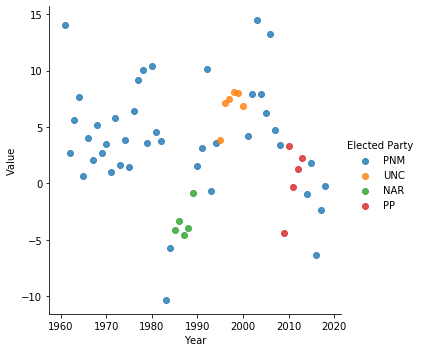

In [397]:
sns.lmplot( x='Year', y='Value', data=df_gdp_2, fit_reg=False, hue='Elected Party', legend=True)

In [398]:
df_gdp_2.groupby('Elected Party')['Value'].mean()

Elected Party
NAR   -3.342000
PNM    3.943751
PP     0.427236
UNC    6.919664
Name: Value, dtype: float64

It can be seen in the above that in T&T's history from 1960 to 2019, UNC led the country through the highest periods of economic growth followed by the PNM.  It should be noted from the scatter plot however, that PNM led the country over a greater period including periods of global economic downturns.  This justifies deepening the understanding of factors which impacted GDP growth to be covered in the next section.

2. Understand if there is any impact to GDP growth as the country invests in energy.

In [399]:
#Determine which metrics we should compare from each sector - adjusted savings
df_adj_sav = df_final[df_final['name_0'].str.contains('Adjusted savings')]
list_of_dfs = list(df_adj_sav['name_0'].unique())
list_of_dfs

['Adjusted savings: education expenditure (current US$)',
 'Adjusted savings: education expenditure (% of GNI)',
 'Adjusted savings: carbon dioxide damage (current US$)',
 'Adjusted savings: carbon dioxide damage (% of GNI)',
 'Adjusted savings: net forest depletion (current US$)',
 'Adjusted savings: net forest depletion (% of GNI)',
 'Adjusted savings: consumption of fixed capital (current US$)',
 'Adjusted savings: consumption of fixed capital (% of GNI)',
 'Adjusted savings: mineral depletion (current US$)',
 'Adjusted savings: mineral depletion (% of GNI)',
 'Adjusted savings: energy depletion (current US$)',
 'Adjusted savings: energy depletion (% of GNI)',
 'Adjusted savings: particulate emission damage (current US$)',
 'Adjusted savings: particulate emission damage (% of GNI)',
 'Adjusted savings: natural resources depletion (% of GNI)']

In [400]:
#Create a dictionary of empty dataframes
d = {}
for name in list_of_dfs:
    d[name] = pd.DataFrame()

#Populate dataframes created above
for i in list_of_dfs:
    data = df_final[df_final['name_0'] == str(i)]
    data = data.drop(data.columns[data.columns.get_loc('code_0'):data.columns.get_loc('code_6')+1], axis=1)
    data = data.drop(data.columns[data.columns.get_loc('name_1'):data.columns.get_loc('name_3')+1], axis=1)
    data = data.drop_duplicates()
    data = data.sort_values(by = ['Year'])
    d[i] = data  

d['Adjusted savings: energy depletion (current US$)'].head()

,Year,Value,name_0,Elected Party
35727,1970,2.417045e+07,Adjusted savings: energy depletion (current US$),PNM
35054,1971,3.132818e+07,Adjusted savings: energy depletion (current US$),PNM
34379,1972,3.977859e+07,Adjusted savings: energy depletion (current US$),PNM
33764,1973,7.912776e+07,Adjusted savings: energy depletion (current US$),PNM
33173,1974,4.730771e+08,Adjusted savings: energy depletion (current US$),PNM


In [401]:
df_GDP_ene = pd.merge(df_gdp_2, d['Adjusted savings: energy depletion (current US$)'], on = 'Year')
df_GDP_ene.rename(columns = {'Value_x':'Annual GDP Growth (%)', 'Value_y':'Energy Spend USD'}, inplace = True)
df_GDP_ene.head()


,Year,Annual GDP Growth (%),code_0,code_1,code_2,code_3,code_4,code_5,code_6,name_0_x,name_1,name_2,name_3,Elected Party_x,Energy Spend USD,name_0_y,Elected Party_y
0,2004,7.950052,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM,1.192719e+09,Adjusted savings: energy depletion (current US$),PNM
1,2003,14.440990,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM,1.040208e+09,Adjusted savings: energy depletion (current US$),PNM
2,2002,7.936710,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM,7.328296e+08,Adjusted savings: energy depletion (current US$),PNM
3,2001,4.168524,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,PNM,6.403799e+08,Adjusted savings: energy depletion (current US$),PNM
4,2000,6.901360,NY,GDP,MKTP,KD,ZG,NaN,NaN,GDP growth (annual %),NaN,NaN,NaN,UNC,8.743316e+08,Adjusted savings: energy depletion (current US$),UNC


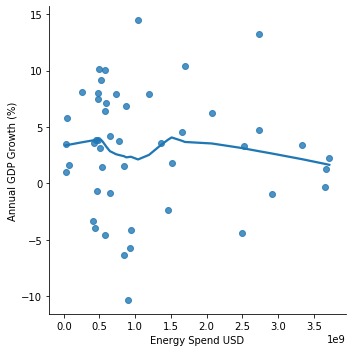

In [402]:
sns.lmplot(y = 'Annual GDP Growth (%)', x = 'Energy Spend USD', data = df_GDP_ene, lowess = True)

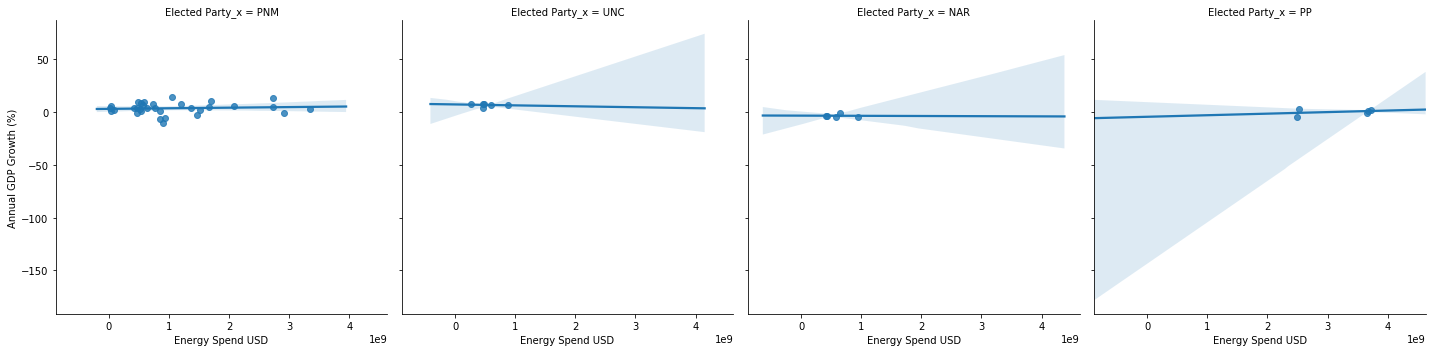

In [403]:
sns.lmplot(y = 'Annual GDP Growth (%)', x = 'Energy Spend USD', data = df_GDP_ene, col = 'Elected Party_x')

There is a gentle downward slope to the trend line suggesting that after a certain point (approx 0.5) as the energy spend increases, GDP growth decreases  
Limited data points exist for parties other than PNM - the attempt to assess by party is not accurate.

3. What is the correlation between investment in education and unemployment?

In [404]:
#Education
education_list = df_clean['name_0'][df_clean['name_0'].str.contains('education')].unique()

In [405]:
edu_list = ['Expenditure on primary education (% of government expenditure on education)',
       'Expenditure on secondary education (% of government expenditure on education)',
       'Expenditure on tertiary education (% of government expenditure on education)',
           'Adjusted savings: education expenditure (current US$)']

#Create a dictionary of empty dataframes
e = {}
for name in edu_list:
    d[name] = pd.DataFrame()

#Populate dataframes created above
for i in edu_list:
    data = df_final[df_final['name_0'] == str(i)]
    data = data.drop(data.columns[data.columns.get_loc('code_0'):data.columns.get_loc('code_6')+1], axis=1)
    data = data.drop(data.columns[data.columns.get_loc('name_0'):data.columns.get_loc('Elected Party')+1], axis=1)
    data = data.drop_duplicates()
    data = data.set_index('Year')
    data = data.sort_values(by = ['Year'])
    d[i] = data  

d['Expenditure on primary education (% of government expenditure on education)'].head()

,Value
Year,
1980,36.814430
1982,43.310989
1983,40.591499
1984,41.064301
1985,42.816738


In [406]:
#Education expenses
Primary = d['Expenditure on primary education (% of government expenditure on education)']
Secondary = d['Expenditure on secondary education (% of government expenditure on education)']
Tertiary = d['Expenditure on tertiary education (% of government expenditure on education)']
Adj_savings_edu = d['Adjusted savings: education expenditure (current US$)']

In [411]:
#Define Unemployment
df_final['name_1'].fillna('void', inplace = True)
Unemployment = df_final[df_final['code_2'].str.contains('TOTL')]
Unemployment = Unemployment[df_final['name_1'].str.contains('(% of total labor force)')]
Unemployment = Unemployment[Unemployment['name_1'].str.contains('national est')]
Unemployment = Unemployment.drop(Unemployment.columns[Unemployment.columns.get_loc('code_0'):Unemployment.columns.get_loc('Elected Party')+1], axis=1)
Unemployment = Unemployment.set_index('Year')
Unemployment = Unemployment.sort_values(by = ['Year'])
Unemployment.head()

C:\Users\Brian.Ali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
C:\Users\Brian.Ali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Value
Year,
1969,13.17
1970,12.76
1971,13.03
1973,15.40
1974,15.24


In [412]:
Primary.rename(columns = {'Value':'Primary'}, inplace = True)
Secondary.rename(columns = {'Value':'Secondary'}, inplace = True)
Tertiary.rename(columns = {'Value':'Tertiary'}, inplace = True)
Unemployment.rename(columns = {'Value':'Unemployment'}, inplace = True)
Adj_savings_edu.rename(columns = {'Value':'Adj_savings_edu'}, inplace = True)
concat_df = pd.concat([Primary, Secondary, Tertiary, Adj_savings_edu, Unemployment], axis = 1)

In [413]:
concat_df.corr()

,Primary,Secondary,Tertiary,Adj_savings_edu,Unemployment
Primary,1.000000,0.447953,-0.483294,-0.112717,0.291176
Secondary,0.447953,1.000000,-0.936544,-0.128500,0.374334
Tertiary,-0.483294,-0.936544,1.000000,0.516882,-0.479487
Adj_savings_edu,-0.112717,-0.128500,0.516882,1.000000,-0.728688
Unemployment,0.291176,0.374334,-0.479487,-0.728688,1.000000


Overall, the higher the spend on education (measured by Adjusted savings: education expenditure), the lower the unemployment.  This was found to be the strongest correlation. 
Weaker correlations are also observed in the data above:
- increasing the propotion of government expenditure in Teritiary school correlates to a decrease in unemployment. 
- decreasing the proportion of government expenditure in Primary and Secondary school correlates to a decrease in unemployment.